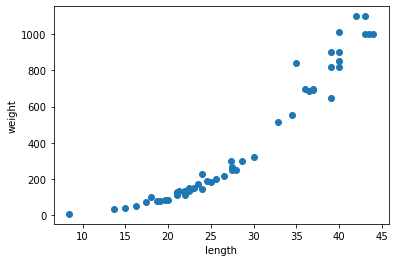

In [2]:
import numpy as np
import matplotlib.pyplot as plt

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

plt.scatter(perch_length,perch_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()



In [3]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(perch_length,perch_weight,random_state = 42)

x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

print(x_train.shape)
print(y_train.shape)

(42, 1)
(42, 1)


In [4]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(x_train,y_train)
x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print(knr.score(x_test,y_test))




0.992809406101064


<h3> 이웃 수에 따른 KNN 회귀의 점수</h3>

In [5]:
from sklearn.metrics import r2_score
Test_score = []
Train_score = []
for neighbor in range(1,20) :
    knr = KNeighborsRegressor(n_neighbors=neighbor)
    knr.fit(x_train,y_train)
    y_pred = knr.predict(x_train)
    Train_score.append(r2_score(y_train,y_pred))
    y_pred = knr.predict(x_test)
    Test_score.append(r2_score(y_test,y_pred))
    
print(Train_score)
print(Test_score)
    

[0.9852830341215901, 0.9828437127041165, 0.9804899950518966, 0.978211389719245, 0.9698823289099254, 0.9757140960298665, 0.9761170732051527, 0.9697604397763201, 0.9693310367551284, 0.96164569026043, 0.9515761381539326, 0.9467103631225754, 0.9413423450130075, 0.9429470576557883, 0.930201118360776, 0.9180230473767479, 0.9087778943199959, 0.8957457327394256, 0.8782082893573573]
[0.991309195814175, 0.9725010241788556, 0.9746459963987609, 0.9840231023848637, 0.992809406101064, 0.9855001139899048, 0.9781383949643516, 0.9780541148735824, 0.9692647749722698, 0.9737908255822255, 0.970279643030474, 0.967703620310643, 0.9639044643206888, 0.9615046463124021, 0.9554827691127018, 0.9485555263458804, 0.9314058693169347, 0.9177544733070506, 0.900993697623706]


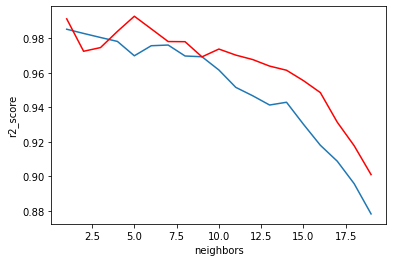

In [6]:
x_list = list(range(1,20))
plt.plot(x_list,Train_score)
plt.plot(x_list,Test_score,c="red")
plt.xlabel("neighbors")
plt.ylabel("r2_score")
plt.show()

<h3>선형 회귀 </h3>

[[39.01714496]] [-709.01864495]


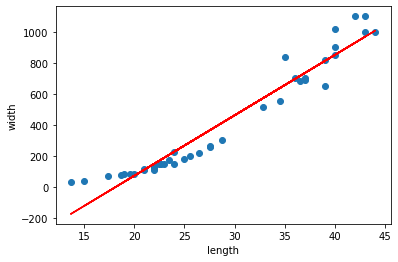

17590.265977889147
0.8247503123313562


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score

lin_reg1 = LinearRegression()
lin_reg1.fit(x_train,y_train)
print(lin_reg1.coef_,lin_reg1.intercept_)
pred_line = lin_reg1.coef_ * x_train + lin_reg1.intercept_

plt.plot(x_train,pred_line,c="red")
plt.scatter(x_train,y_train)
plt.xlabel("length")
plt.ylabel("width")
plt.show()
print(mean_squared_error(y_test,lin_reg1.predict(x_test)))
print(lin_reg1.score(x_test,y_test))



<h3> 다항회귀 </h3>

In [8]:
from sklearn.preprocessing import PolynomialFeatures
Poly_features= PolynomialFeatures(degree=5,include_bias=False)
x_poly = Poly_features.fit_transform(x_train)
x_poly[0]

array([1.96000000e+01, 3.84160000e+02, 7.52953600e+03, 1.47578906e+05,
       2.89254655e+06])

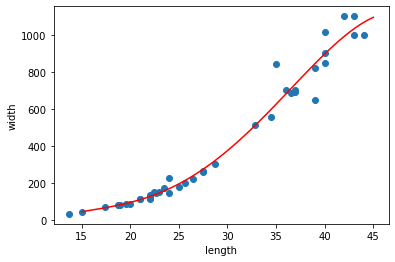

1753.098413229777
0.9825340930172916


In [37]:
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y_train)
x_new = np.linspace(15,45,100).reshape(-1,1)
pred = lin_reg2.predict(Poly_features.fit_transform(x_new))

plt.scatter(x_train,y_train)
plt.plot(x_new,pred,c="red")
plt.xlabel("length")
plt.ylabel("width")
plt.show()
print(mean_squared_error(y_test,lin_reg2.predict(Poly_features.fit_transform(x_test))))
print(lin_reg2.score(Poly_features.fit_transform(x_test),y_test))


<h3>다중 회귀</h3>

In [38]:

import pandas as pd
df = pd.read_csv('./perch.csv')
print(df.info())
x_data = df[['length','height']]
y_data = df['width']
print(x_data.shape,y_data.shape)

X_train,X_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=42)

lin_reg3 = LinearRegression()
lin_reg3.fit(X_train,y_train)
print(lin_reg3.coef_,lin_reg3.intercept_)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   length  56 non-null     float64
 1   height  56 non-null     float64
 2   width   56 non-null     float64
dtypes: float64(3)
memory usage: 1.4 KB
None
(56, 2) (56,)
[0.028161   0.51349424] -0.11675293286510602


In [39]:
pred = lin_reg3.predict(X_test)


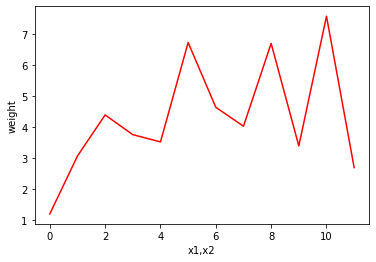

0.10486212310511987
0.9712409017335145


In [40]:

plt.plot(pred,c="r")
plt.xlabel("x1,x2")
plt.ylabel("weight")
plt.show()
print(mean_squared_error(y_test,pred))
print(lin_reg3.score(X_test,y_test))

<h3>도미와 빙어 분류(혼자 공부하는 머신러닝 9강 로지스특 회귀 알아보기-youtube)</h3>

In [41]:
import pandas as pd
fish = pd.read_csv("https://bit.ly/fish_csv_data")
print(fish.head())


  Species  Weight  Length  Diagonal   Height   Width
0   Bream   242.0    25.4      30.0  11.5200  4.0200
1   Bream   290.0    26.3      31.2  12.4800  4.3056
2   Bream   340.0    26.5      31.1  12.3778  4.6961
3   Bream   363.0    29.0      33.5  12.7300  4.4555
4   Bream   430.0    29.0      34.0  12.4440  5.1340


In [42]:
fish_input = fish[["Weight","Length","Diagonal","Height","Width"]].to_numpy()
fish_target = fish["Species"].to_numpy()

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(fish_input,fish_target,test_size=0.2,random_state=121)
Standard_features= StandardScaler() # KNN은 거리기반 모델이기 때문에 정규화를 해주어야 한다.

train_scaled = Standard_features.fit_transform(X_train)
test_scaled = Standard_features.fit_transform(X_test)
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, y_train)

print(kn.classes_)
print(kn.predict(test_scaled[:5]))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Pike' 'Perch' 'Roach' 'Bream' 'Perch']


In [44]:
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4)) #각 생선의 종류별(열 번호) 그 생선일 확률

[[0.     0.     0.3333 0.6667 0.     0.     0.    ]
 [0.     0.     0.3333 0.     0.3333 0.3333 0.    ]
 [0.     0.     0.3333 0.     0.6667 0.     0.    ]
 [1.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


<h3> 로지스틱 회귀(이진 분류) </h3>

In [70]:
bream_smelt_indexes = (y_train == "Bream") | (y_train =="Smelt")
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = y_train[bream_smelt_indexes]

In [71]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt,target_bream_smelt)

LogisticRegression()

In [72]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Bream' 'Smelt' 'Bream' 'Bream']


In [73]:
proba = lr.predict_proba(train_bream_smelt[:10])
print(np.round(proba,decimals=3))


[[1.    0.   ]
 [0.998 0.002]
 [0.026 0.974]
 [0.999 0.001]
 [0.995 0.005]
 [0.996 0.004]
 [0.995 0.005]
 [0.039 0.961]
 [0.997 0.003]
 [0.998 0.002]]


In [74]:
print(lr.coef_,lr.intercept_)

[[-0.40309887 -0.61042763 -0.69332938 -0.99280618 -0.7666636 ]] [-2.66377088]


<h3>로지스틱 회귀(다항회귀)</h3>

In [75]:
decisions = lr.decision_function(train_bream_smelt[:5]) #Z값 계산
print(decisions)

[-7.62370359 -5.99262334  3.63544708 -6.66442711 -5.28149245]


In [76]:
from scipy.special import expit
print(expit(decisions))

[4.88489689e-04 2.49088470e-03 9.74305478e-01 1.27386233e-03
 5.05911150e-03]


In [77]:
lr = LogisticRegression(C=20,max_iter=1000)
lr.fit(train_scaled,y_train)

LogisticRegression(C=20, max_iter=1000)

In [78]:
print(lr.score(train_scaled,y_train))
print(lr.score(test_scaled,y_test))

0.937007874015748
0.71875


In [79]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba,decimals=3))

[[0.    0.    0.002 0.998 0.    0.    0.   ]
 [0.    0.068 0.109 0.001 0.219 0.599 0.004]
 [0.    0.156 0.266 0.001 0.525 0.027 0.026]
 [0.997 0.001 0.    0.    0.    0.    0.002]
 [0.002 0.009 0.439 0.001 0.456 0.    0.093]]


In [80]:
print(lr.coef_.shape,lr.intercept_.shape)
#5는 특성과 곱해지는 계수 , 7은 클래스마다 선형함수가 하나씩 만들어 지는 것을 나타낸다.
#결국 다중 분류는 이진 분류기(특정 클래스와 나머지 클래스)가 여러개를 병렬로 조합하여 계산함을 나타낸다.

(7, 5) (7,)


In [81]:
print(lr.coef_)         #7개의 시그모이드 함수의 합이 1이 되도록 함
print(lr.intercept_)

[[-1.57730795 -1.05814373  2.49978255  7.94144411 -0.68778893]
 [ 0.03478615 -1.7849712  -3.29690458  6.76439015 -2.27430133]
 [ 3.08210263  7.45861574 -8.23112543 -6.81034996  4.40427953]
 [-0.1354286   3.98151113  4.40453267 -3.99546546 -1.65602305]
 [-1.91623107 -5.85202966  5.71025609 -1.17972575  2.17153389]
 [-0.77964556 -1.03229006 -1.52461224 -3.77057482 -4.02091315]
 [ 1.29172441 -1.71269221  0.43807094  1.05028173  2.06321305]]
[  1.43065701   0.2229308    3.1065633    0.26012424   2.76661418
 -11.1911319    3.40424236]


<h3> 소프트맥스 함수</h3>

In [82]:
decisions = lr.decision_function(test_scaled[:5])
print(np.round(decisions,decimals=2))

[[  2.64  -9.28   7.43  13.51   1.23 -19.09   3.56]
 [ -7.54   1.79   2.26  -2.53   2.97   3.97  -0.92]
 [ -5.34   2.12   2.66  -3.48   3.34   0.35   0.34]
 [ 13.63   7.07  -3.95  -4.07   2.28 -22.33   7.37]
 [ -1.48   0.1    4.03  -1.72   4.07  -7.47   2.48]]


In [83]:
from scipy.special import softmax
proba = softmax(decisions,axis=1)